#  60. 単語ベクトルの読み込みと表示

Google Newsデータセット（約1,000億単語）での学習済み単語ベクトル（300万単語・フレーズ，300次元）をダウンロードし，”United States”の単語ベクトルを表示せよ．ただし，”United States”は内部的には”United_States”と表現されていることに注意せよ．

In [1]:
!gunzip data/GoogleNews-vectors-negative300.bin.gz

In [126]:
import gensim
from sklearn.metrics import accuracy_score
from itertools import islice
import pandas as pd
from scipy.stats import spearmanr
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [52]:
#  よくわからない
#  !head data/GoogleNews-vectors-negative300.bin

In [3]:
#  ダウンロードしたファイルをgensimで読み込む
#  これで単語をベクトル表現に変換するためのモデルができる

model = gensim.models.KeyedVectors.load_word2vec_format("data/GoogleNews-vectors-negative300.bin", binary=True)

In [85]:
type(model)

gensim.models.keyedvectors.KeyedVectors

In [11]:
print(model['United_States'])

[-3.61328125e-02 -4.83398438e-02  2.35351562e-01  1.74804688e-01
 -1.46484375e-01 -7.42187500e-02 -1.01562500e-01 -7.71484375e-02
  1.09375000e-01 -5.71289062e-02 -1.48437500e-01 -6.00585938e-02
  1.74804688e-01 -7.71484375e-02  2.58789062e-02 -7.66601562e-02
 -3.80859375e-02  1.35742188e-01  3.75976562e-02 -4.19921875e-02
 -3.56445312e-02  5.34667969e-02  3.68118286e-04 -1.66992188e-01
 -1.17187500e-01  1.41601562e-01 -1.69921875e-01 -6.49414062e-02
 -1.66992188e-01  1.00585938e-01  1.15722656e-01 -2.18750000e-01
 -9.86328125e-02 -2.56347656e-02  1.23046875e-01 -3.54003906e-02
 -1.58203125e-01 -1.60156250e-01  2.94189453e-02  8.15429688e-02
  6.88476562e-02  1.87500000e-01  6.49414062e-02  1.15234375e-01
 -2.27050781e-02  3.32031250e-01 -3.27148438e-02  1.77734375e-01
 -2.08007812e-01  4.54101562e-02 -1.23901367e-02  1.19628906e-01
  7.44628906e-03 -9.03320312e-03  1.14257812e-01  1.69921875e-01
 -2.38281250e-01 -2.79541016e-02 -1.21093750e-01  2.47802734e-02
  7.71484375e-02 -2.81982

#  61. 単語の類似度

“United States”と”U.S.”のコサイン類似度を計算せよ．

In [17]:
#  print(model['U.S.'])

In [18]:
model.similarity('United_States', 'U.S.')

0.7310774

In [28]:
model.similarity('U.K.', 'Britain')

0.46944168

#  62. 類似度の高い単語10件

“United States”とコサイン類似度が高い10語と，その類似度を出力せよ．

In [30]:
#  デフォがtopn=10
#  少し時間かかる

model.most_similar('United_States')

[('Unites_States', 0.7877249717712402),
 ('Untied_States', 0.7541371583938599),
 ('United_Sates', 0.74007248878479),
 ('U.S.', 0.7310774326324463),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178409457206726),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.6019068956375122)]

#  63. 加法構成性によるアナロジー

“Spain”の単語ベクトルから”Madrid”のベクトルを引き，”Athens”のベクトルを足したベクトルを計算し，そのベクトルと類似度の高い10語とその類似度を出力せよ．

In [31]:
new_vec = model['Spain'] - model['Madrid'] + model['Athens']
model.most_similar(new_vec)

[('Athens', 0.7528454065322876),
 ('Greece', 0.6685471534729004),
 ('Aristeidis_Grigoriadis', 0.5495778322219849),
 ('Ioannis_Drymonakos', 0.5361457467079163),
 ('Greeks', 0.5351787209510803),
 ('Ioannis_Christou', 0.5330226421356201),
 ('Hrysopiyi_Devetzi', 0.5088489055633545),
 ('Iraklion', 0.5059264898300171),
 ('Greek', 0.5040615200996399),
 ('Athens_Greece', 0.5034109354019165)]

#  64. アナロジーデータでの実験

単語アナロジーの評価データをダウンロードし，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．求めた単語と類似度は，各事例の末尾に追記せよ．

In [33]:
#  !wget http://download.tensorflow.org/data/questions-words.txt -P data/

In [34]:
!head data/questions-words.txt

: capital-common-countries
Athens Greece Baghdad Iraq
Athens Greece Bangkok Thailand
Athens Greece Beijing China
Athens Greece Berlin Germany
Athens Greece Bern Switzerland
Athens Greece Cairo Egypt
Athens Greece Canberra Australia
Athens Greece Hanoi Vietnam
Athens Greece Havana Cuba


In [49]:
with open('data/questions-words.txt') as fi, open('work/questions-words_result.txt', 'w') as fo:
    for line in fi:
        line = line.rstrip()
        if line[0] == ':':
            fo.write(f'titel{line}\n')
        else:
            words_line = line.split()
            result = model.most_similar(positive=[words_line[1], words_line[2]], negative=[words_line[0]], topn=1)
            pred, score = result[0]
            fo.write(f'{line}\t{pred}\t{score}\n')

In [50]:
!head work/questions-words_result.txt

titel: capital-common-countries
Athens Greece Baghdad Iraq	Iraqi	0.6351870894432068
Athens Greece Bangkok Thailand	Thailand	0.7137669920921326
Athens Greece Beijing China	China	0.7235777378082275
Athens Greece Berlin Germany	Germany	0.6734623908996582
Athens Greece Bern Switzerland	Switzerland	0.4919748306274414
Athens Greece Cairo Egypt	Egypt	0.7527807950973511
Athens Greece Canberra Australia	Australia	0.583732545375824
Athens Greece Hanoi Vietnam	Viet_Nam	0.6276342272758484
Athens Greece Havana Cuba	Cuba	0.6460990905761719


In [51]:
!tail work/questions-words_result.txt

write writes sing sings	sings	0.7207170724868774
write writes sit sits	sits	0.5543497204780579
write writes slow slows	slows	0.5092940926551819
write writes speak speaks	speaks	0.654321551322937
write writes swim swims	swims	0.6643378734588623
write writes talk talks	talked	0.5447186827659607
write writes think thinks	thinks	0.6177732944488525
write writes vanish vanishes	disappear	0.6002705693244934
write writes walk walks	walks	0.5534340143203735
write writes work works	works	0.5387607216835022


#  65. アナロジータスクでの正解率

64の実行結果を用い，意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ．

In [14]:
!wc work/questions-words_result.txt

   19558  117292 1136538 work/questions-words_result.txt


In [8]:
#  データ整形の時に誤字っている...
!cat -n work/questions-words_result.txt | grep titel

     1	titel: capital-common-countries
   508	titel: capital-world
  5033	titel: currency
  5900	titel: city-in-state
  8368	titel: family
  8875	titel: gram1-adjective-to-adverb
  9868	titel: gram2-opposite
 10681	titel: gram3-comparative
 12014	titel: gram4-superlative
 13137	titel: gram5-present-participle
 14194	titel: gram6-nationality-adjective
 15794	titel: gram7-past-tense
 17355	titel: gram8-plural
 18688	titel: gram9-plural-verbs


In [97]:
#  教師, 教師, 入力, gold, 予測, 類似度
def get_acc(txt_data, mode):
    with open(txt_data) as fi:
        gold = []
        pred =[]
        if mode == 'semantic':
            for line in islice(fi,8368):
                if line.startswith('titel'):
                    continue
                else:
                    gold.append(line.split()[3])
                    pred.append(line.split()[4])
                    
            return accuracy_score(gold, pred)
        
        elif mode == 'syntactic':
            for line in islice(fi,8874,19558):
                if line.startswith('titel'):
                    continue
                else:
                    gold.append(line.split()[3])
                    pred.append(line.split()[4])
                
            return accuracy_score(gold, pred)
        
        else:
            print('error')
            


In [47]:
print(get_acc('work/questions-words_result.txt', 'semantic'))
print(get_acc('work/questions-words_result.txt', 'syntactic'))

0.7239029056558651
0.7400468384074942


#  66. WordSimilarity-353での評価

The WordSimilarity-353 Test Collectionの評価データをダウンロードし，単語ベクトルにより計算される類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ

In [49]:
!wget --no-check-certificate https://gabrilovich.com/resources/data/wordsim353/wordsim353.zip -P data/

--2023-07-02 11:27:22--  https://gabrilovich.com/resources/data/wordsim353/wordsim353.zip
gabrilovich.com (gabrilovich.com) をDNSに問いあわせています... 208.97.177.37
gabrilovich.com (gabrilovich.com)|208.97.177.37|:443 に接続しています... 接続しました。
警告: gabrilovich.com の証明書(発行者: `CN=R3,O=Let\'s Encrypt,C=US')の検証に失敗しました:
  発行された証明書は失効しています。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 23257 (23K) [application/zip]
`data/wordsim353.zip' に保存中

wordsim353.zip      100%[===================>]  22.71K   118KB/s 時間 0.2s       

2023-07-02 11:27:23 (118 KB/s) - `data/wordsim353.zip' へ保存完了 [23257/23257]



In [50]:
import zipfile
zip_f =  zipfile.ZipFile('data/wordsim353.zip')
zip_list = zip_f.namelist()
print(zip_list)

['combined.csv', 'set1.csv', 'set2.csv', 'combined.tab', 'set1.tab', 'set2.tab', 'instructions.txt']


In [51]:
!unzip -d data data/wordsim353.zip

Archive:  data/wordsim353.zip
  inflating: data/combined.csv       
  inflating: data/set1.csv           
  inflating: data/set2.csv           
  inflating: data/combined.tab       
  inflating: data/set1.tab           
  inflating: data/set2.tab           
  inflating: data/instructions.txt   


In [74]:
df =  pd.read_csv("data/combined.csv")
df

,Word 1,Word 2,Human (mean)
0,love,sex,6.77
1,tiger,cat,7.35
2,tiger,tiger,10.00
3,book,paper,7.46
4,computer,keyboard,7.62
...,...,...,...
348,shower,flood,6.03
349,weather,forecast,8.34
350,disaster,area,6.25
351,governor,office,6.34


In [87]:
human_score = []
model_pred_score = []
with open('data/combined.csv') as fi:
    for line in islice(fi,1,353):
        line = line.rstrip().split(',')
        word1 = line[0]
        word2 = line[1]
        human_mean = line[2]
        human_score.append(float(human_mean))
        model_pred_score.append(model.similarity(word1, word2))


In [88]:
print(len(human_score), len(model_pred_score))

352 352


In [92]:
correlation, pvalue = spearmanr(human_score, model_pred_score)
print(f'スピアマン順位相関係数 : {correlation}\np値 : {pvalue}')

スピアマン順位相関係数 : 0.6992302291447042
p値 : 5.872420479437039e-53


#  67. k-meansクラスタリング

国名に関する単語ベクトルを抽出し，k-meansクラスタリングをクラスタ数k=5として実行せよ．

In [123]:
countries = set()
#  capital-common-countriesから国名を抽出？
#　　国名収集
with open('work/questions-words_result.txt', 'r') as fi:
    for line in islice(fi,5032):
        if line.startswith('titel'):
            continue
        else:
            line = line.rstrip().split()
            countries.add(line[0])
            countries.add(line[1])
            countries.add(line[2])
            countries.add(line[3])
            

#  ベクトル化
country_vec = []
for country in countries:
    country_vec.append(model[country])
country_vec = np.array(country_vec)


In [124]:
len(countries)

232

In [125]:
kmeans = KMeans(n_clusters=5, random_state=315)
pred_class = kmeans.fit_predict(country_vec)
print(len(pred_class))
print(pred_class)

232
[4 4 3 0 3 3 3 2 4 3 3 0 2 1 2 4 3 1 2 0 3 3 2 3 3 0 2 0 1 3 3 3 3 2 2 3 3
 2 2 4 1 2 0 3 1 0 0 0 2 2 0 3 2 0 0 4 4 3 3 4 4 3 1 3 0 0 1 1 0 0 0 0 2 4
 3 3 3 1 4 4 3 3 0 1 1 2 0 2 3 4 3 3 0 4 4 1 0 2 3 0 2 0 3 0 4 1 3 4 0 1 4
 1 3 2 2 2 0 4 4 1 3 0 0 0 2 2 2 1 2 3 3 3 3 2 0 2 0 2 3 3 3 0 2 0 0 3 2 0
 2 2 3 2 2 2 3 3 2 3 3 2 3 3 4 3 4 1 2 4 4 1 1 2 2 2 2 3 3 4 1 4 2 3 2 1 3
 0 4 3 3 0 3 3 3 2 4 3 0 2 1 2 2 2 3 1 3 2 4 3 2 3 3 3 4 4 2 2 4 3 4 3 4 4
 0 0 3 1 0 2 3 0 1 0]


/Users/miuranaoki/.pyenv/versions/100knock/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#  68. Ward法によるクラスタリング

国名に関する単語ベクトルに対し，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリング結果をデンドログラムとして可視化せよ．

In [129]:
countries_list = list(countries)

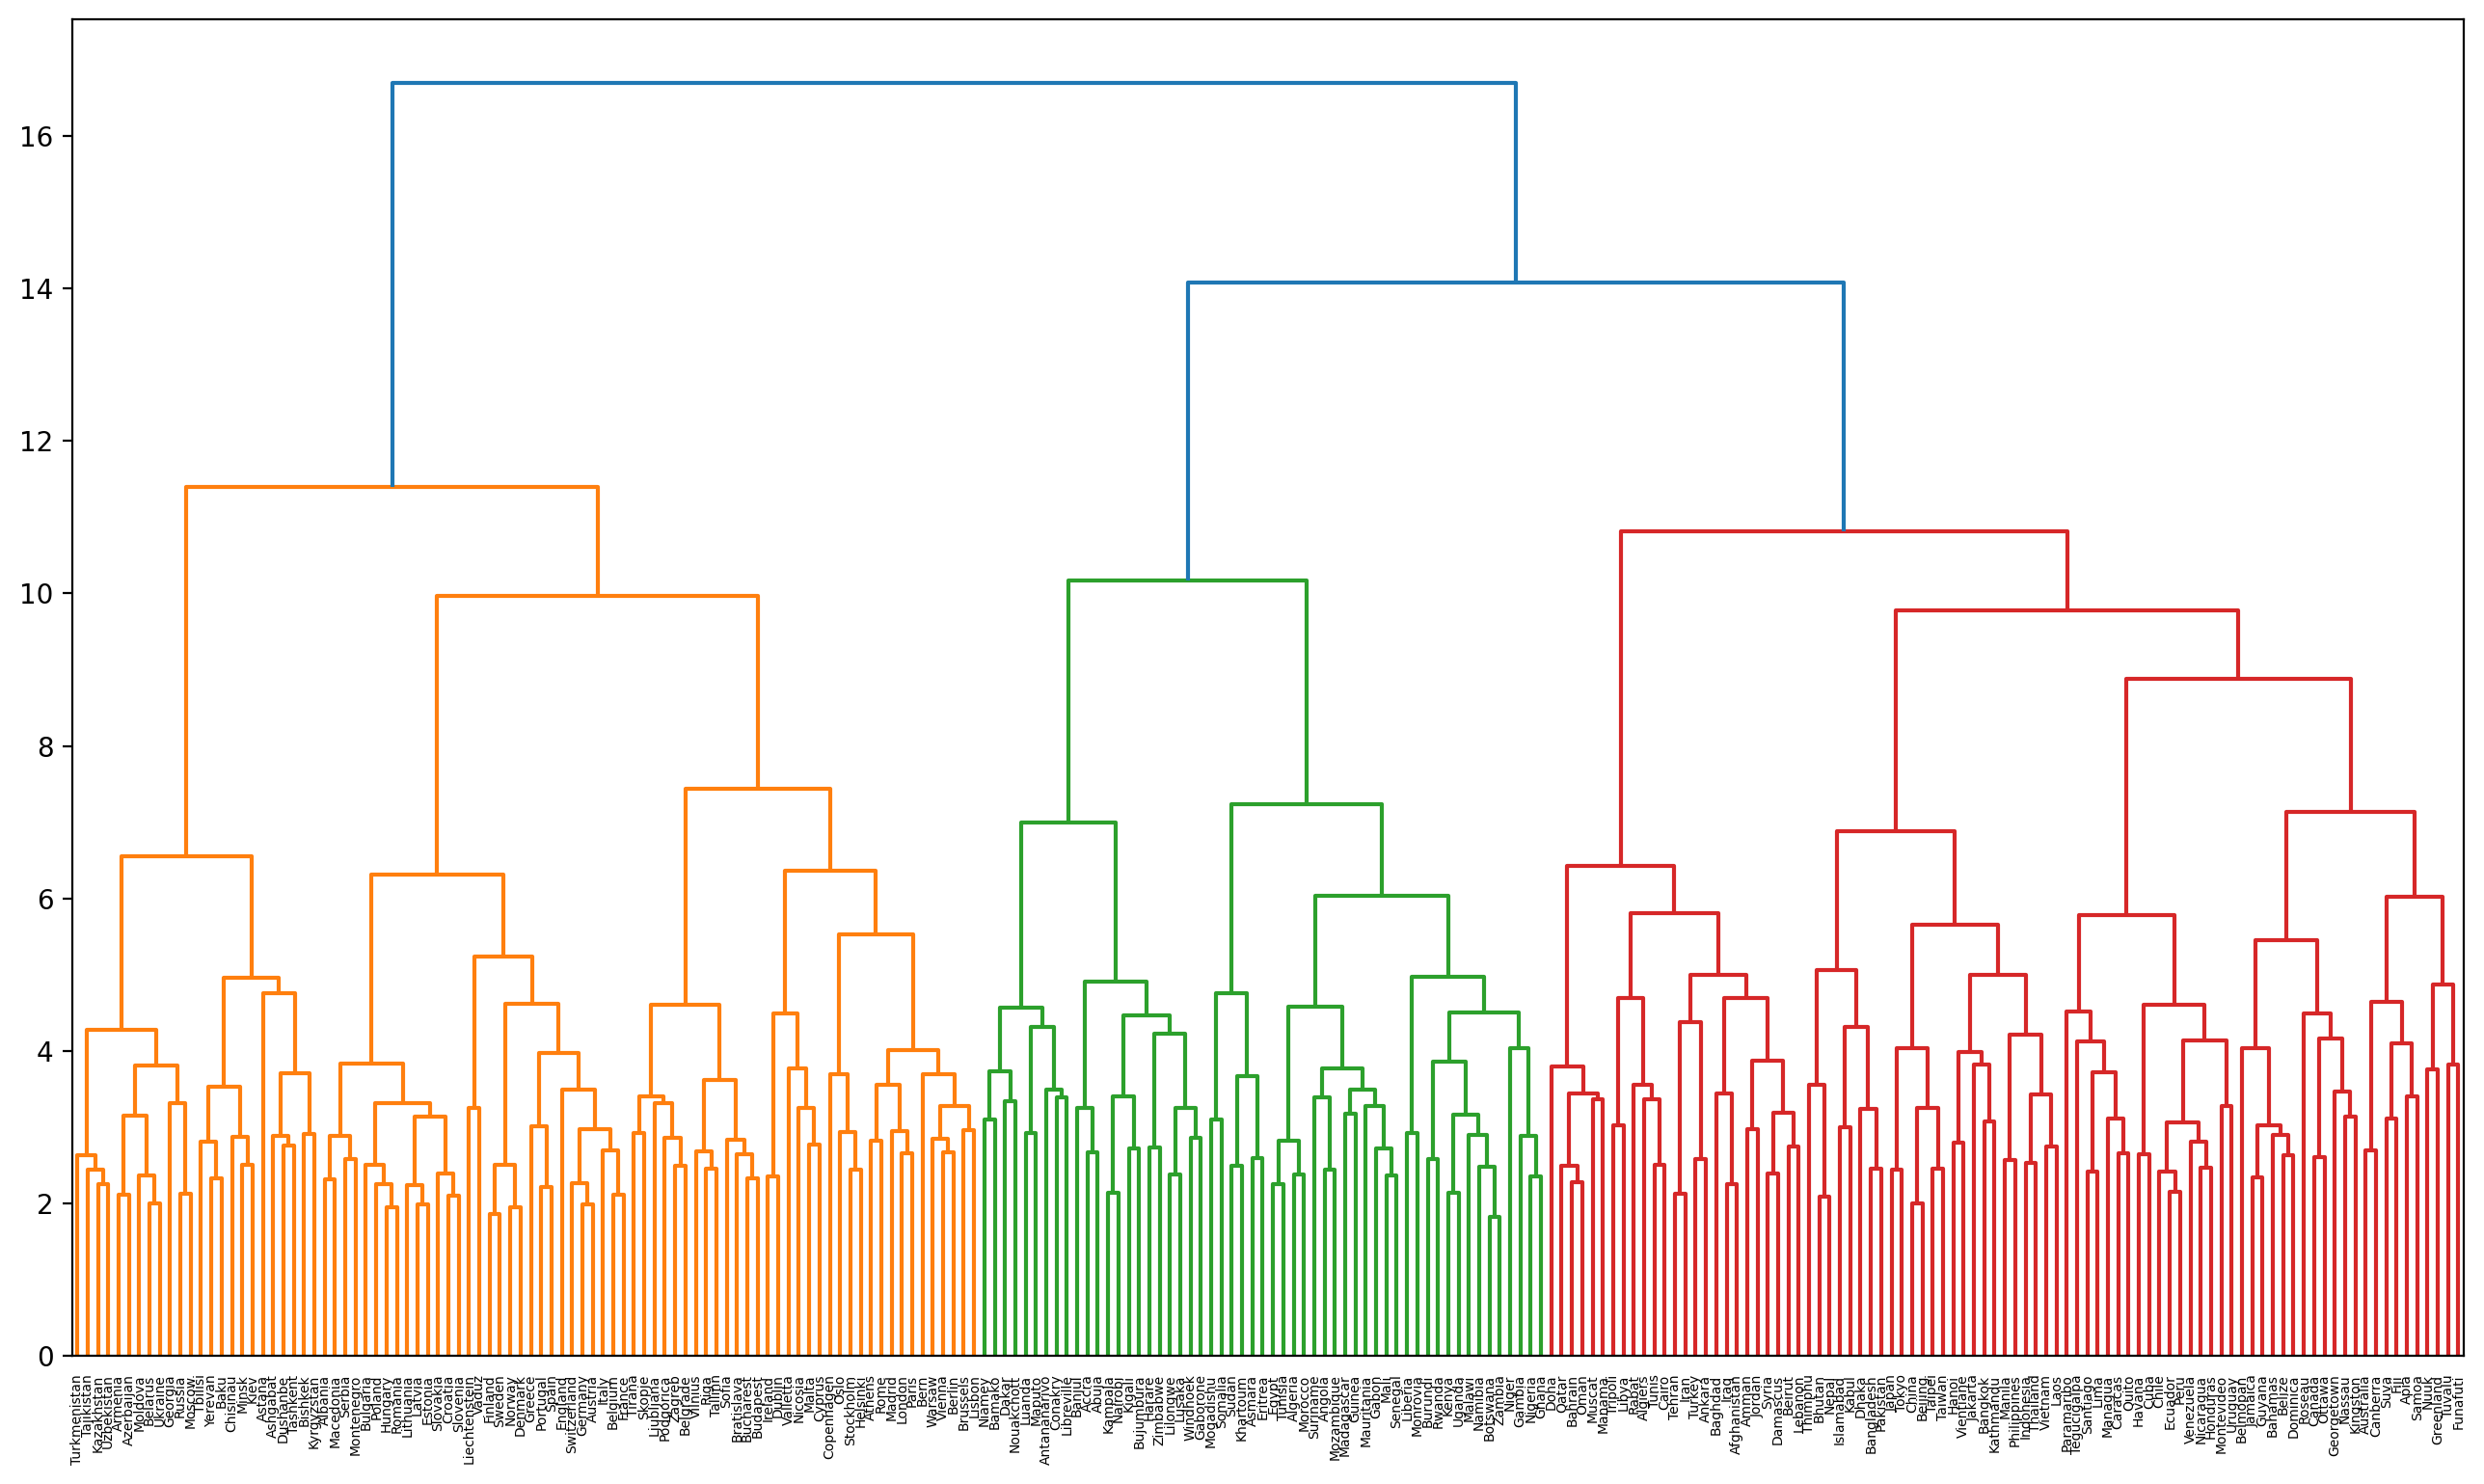

In [130]:
#  linkage関数はベクトルデータを指定された方法（この例ではward法）でクラスタリングし、その結果を行列形式(linkage matrix)として返す
linkage_result = linkage(country_vec, method='ward', metric='euclidean')
plt.figure(num=None, figsize=(16, 9), dpi=200, facecolor='w', edgecolor='k')
dendrogram(linkage_result, labels=countries_list)
plt.show()

#  69. t-SNEによる可視化

ベクトル空間上の国名に関する単語ベクトルをt-SNEで可視化せよ．

/Users/miuranaoki/.pyenv/versions/100knock/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


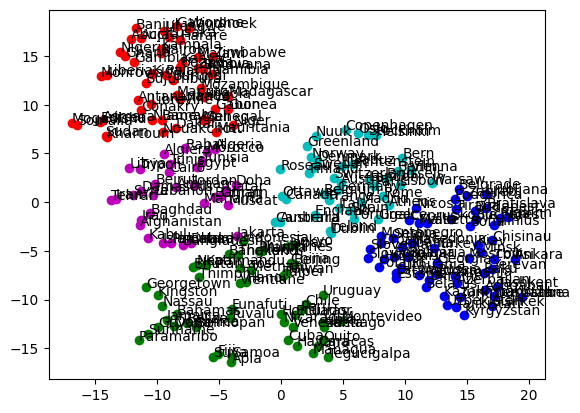

In [140]:
#  t-SNEで次元削減
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state = 0, perplexity = 30, n_iter = 1000)
country_vec_embedded = tsne.fit_transform(country_vec)

#
kmeans = KMeans(n_clusters=5, random_state=315)
pred_class = kmeans.fit(country_vec_embedded)

colors = ["r", "g", "b", "c", "m"]

for name, vec in zip(countries_list, country_vec_embedded):
    pred_class = kmeans.predict(np.array([vec]))
    
    plt.scatter(vec[0], vec[1], c=colors[int(pred_class)])
    plt.text(vec[0], vec[1], name)
    #print(int(pred_class))
    